# Linear regression with scikit-learn

In [1]:
import math
import statistics

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

Statistical analysis of data obtained in the instrumental analysis laboratory course.  
The data just below are data to generate the calibration curve, and data from samples analyzed in the laboratory.

For the construction of the analytical curve (regression), we will need the absorbance data in 5 different concentrations, the data we obtained are the intensities of the light when passed through the sample, and the intensity of the incident light. From these data we can easily calculate the absorbance through the equation:

$ Absorbance = -log\frac{Io}{I} $

In [2]:
# Function to calculate absorbance
def absorbance(i0: float, i: float) -> float:
    return -math.log10(i0 / i)


# Absorbance data to generate the regression in mg/L
x_data = {
    "label": "ABS",
    "info": "ABS of Fe",
    "data": [
        absorbance(1.02, 1.27),
        absorbance(0.99, 1.53),
        absorbance(0.97, 1.91),
        absorbance(0.97, 2.41),
        absorbance(0.96, 3.03),
    ],
}

# Concentration data to generate the regression in mg/L
y_data = {"label": "Concentration", "info": "Concentration of the Fe curve", "data": [1, 2, 3, 4, 5]}

In [3]:
# Transform our data to pass to our linear model
X = [[i] for i in x_data["data"]]
y = y_data["data"]

In [4]:
# Instanciate and fit our model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [5]:
model_summary = {
    "Equation": f"{y_data['label']} = {model.coef_[0]:.4f} x {x_data['label']} + {model.intercept_:.4f}",
    "R-squared": model.score(X, y),
}

summary_df = pd.DataFrame(model_summary.items())
summary_df

,0,1
0,Equation,Concentration = 9.8576 x ABS + 0.0961
1,R-squared,0.999683


In [6]:
# Data to plot line
x_line = np.linspace(np.min(X), np.max(X), 1000)
y_line = [model.predict([[i]])[0] for i in x_line]

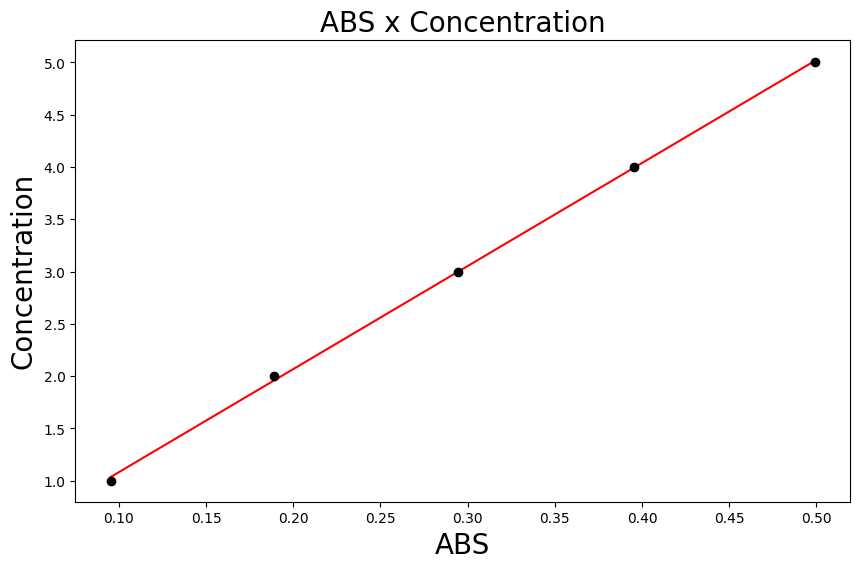

In [ ]:
plt.figure(figsize=(10, 6))
plt.title(f"{x_data['label']} x {y_data['label']}", fontsize=20)
plt.xlabel(x_data["label"], fontsize=20)
plt.ylabel(y_data["label"], fontsize=20)

plt.plot(x_line, y_line, color="red", zorder=1)
plt.scatter(x_data["data"], y_data["data"], color="black", zorder=2)
plt.show()

# Making inference

Here we have 3 measurements of the same sample to perform the inference.

In [10]:
measures = {
    "label": "ABS",
    "units_of_measure": "mg/L",
    "data": [absorbance(0.96, 1.96), absorbance(0.96, 1.96), absorbance(0.96, 1.97)],
}

In [11]:
# Predict
predicts = [model.predict([[i]])[0] for i in measures["data"]]

In [12]:
mean = statistics.mean(predicts)
std = statistics.stdev(predicts)

In [13]:
print(f"Concentration of sample: {mean:.4f} {measures['units_of_measure']}")
print(f"Standard deviation: {std:.4f}.")

Concentration of sample: 3.1590 mg/L
Standard deviation: 0.0126.
